# Logistic Regression from scratch

## Importing Modules

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [4]:
data = pd.read_csv("HR_data.csv")
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.81,0.66,3,181,2,1,0,0,sales,medium
1,0.75,0.75,5,133,2,0,0,0,sales,low
2,0.57,0.75,5,252,3,0,0,0,RandD,medium
3,0.41,0.48,2,130,3,0,1,0,support,high
4,0.76,0.77,5,133,2,0,0,0,sales,high


In [5]:
data.groupby("Department")["Department"].count()

Department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: Department, dtype: int64

In [6]:
data.groupby("salary")["salary"].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

## One-Hot Encoding

In [7]:
data = pd.get_dummies(data, columns=["Department", "salary"])

In [8]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.81,0.66,3,181,2,1,0,0,False,False,...,False,False,False,False,True,False,False,False,False,True
1,0.75,0.75,5,133,2,0,0,0,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0.57,0.75,5,252,3,0,0,0,False,True,...,False,False,False,False,False,False,False,False,False,True
3,0.41,0.48,2,130,3,0,1,0,False,False,...,False,False,False,False,False,True,False,True,False,False
4,0.76,0.77,5,133,2,0,0,0,False,False,...,False,False,False,False,True,False,False,True,False,False


In [9]:
data = data.select_dtypes(include=["int64", "int32", "float64", "float32"])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.81,0.66,3,181,2,1,0,0
1,0.75,0.75,5,133,2,0,0,0
2,0.57,0.75,5,252,3,0,0,0
3,0.41,0.48,2,130,3,0,1,0
4,0.76,0.77,5,133,2,0,0,0


## Train-Test Split

In [10]:
n = 100
x_train, y_train = data["satisfaction_level"][:n], data["left"][:n]
x_test, y_test = data["satisfaction_level"][n:], data["left"][n:]

## Plotting

(Text(0.5, 0, 'Satisfaction'), Text(0, 0.5, 'Left'))

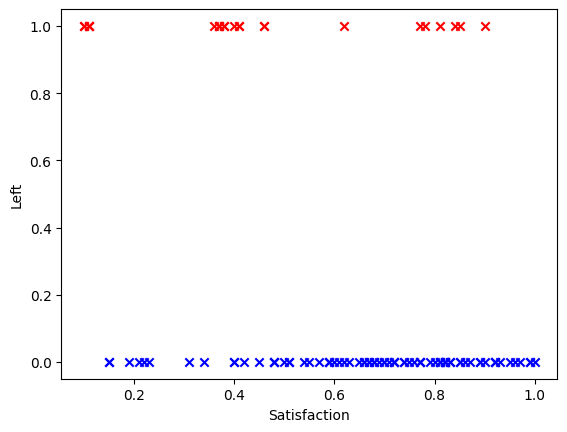

In [11]:
for index in range(n):
    x, y = x_train[index], y_train[index]
    if y_train[index] == 1:
        plt.scatter(x, y, marker="x", color="red")
    else:
        plt.scatter(x, y, marker="x", color="blue")
        
plt.xlabel("Satisfaction"), plt.ylabel("Left")

## Logistic Regression Algorithm

In [12]:
def sigmoid(w, x, b):
    return (1/ (1 + np.exp(-(w * x + b))))

In [13]:
def gradient_descent(x, y, w, b, N, lr, iterations=1000):
    delta = 1e-15
    plt_mse = np.array([])
    for _ in range(iterations):
        y_pred = sigmoid(w, x, b)

        cost = -np.sum(y * np.log(y_pred + delta) + np.dot((1 - y), np.log(1 - y_pred + delta))) / N
        plt_mse = np.append(plt_mse, np.array(cost))
        
        dw = np.sum(2 * np.dot(x, (y_pred - y))) / N
        db = np.sum(2 * (y_pred - y)) / N
        
        w = w - lr * dw
        b = b - lr * db
        
    return w, b, plt_mse

## Visualizing Log-Loss vs iterations

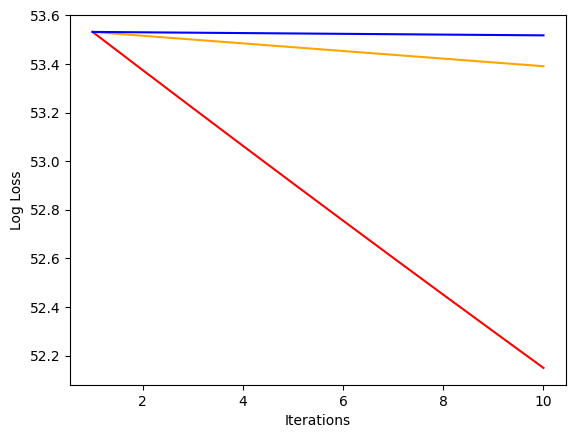

In [14]:
optimums = [[0.5e-2, "red"], [0.5e-3, "orange"], [0.5e-4, "blue"]]
w_items, b_items = [], []
plt.xlabel("Iterations"), plt.ylabel("Log Loss")
for item in optimums:
    num = 10
    w, b, plt_mse = gradient_descent(x_train, y_train, 0, 0, n, item[0])
    w_items.append(w), b_items.append(b)
    iters = np.arange(1, len(plt_mse)+1)
    plt.plot(iters[:num], plt_mse[:num], color=item[1])

## Predictions

-0.7751834849383072 -0.7190165265510806


(Text(0.5, 0, 'Satisfaction'), Text(0, 0.5, 'Left'))

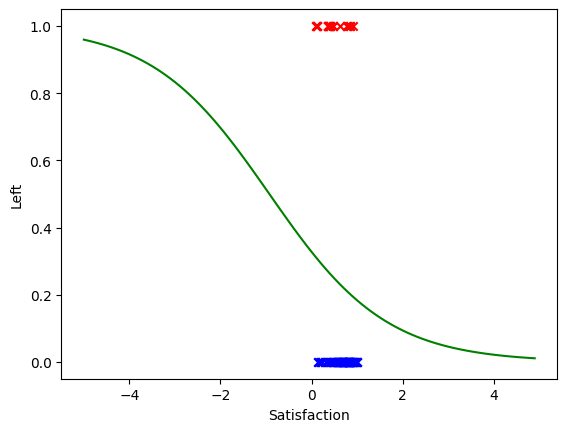

In [15]:
w, b = w_items[0], b_items[0]
print(w, b)
for index in range(n):
    x, y = x_train[index], y_train[index]
    if y_train[index] == 1:
        plt.scatter(x, y, marker="x", color="red")
    else:
        plt.scatter(x, y, marker="x", color="blue")


x = np.arange(-5, 5, 0.1)
y_pred = sigmoid(x, w, b)
plt.plot(x, y_pred, color="green")
        
plt.xlabel("Satisfaction"), plt.ylabel("Left")